In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
def calculate_correlation(df, x_column, y_column):
    """
    Calculate correlation coefficient between two columns in a DataFrame.
    Parameters:
    - df (pd.DataFrame): The DataFrame.
    - x_column (str): Name of the first column.
    - y_column (str): Name of the second column.
    Returns:
    - list: Correlation coefficients for each unique driver.
    """
    drivers = df['driverCode'].unique()
    correlation_coefficients = []
    for driver in drivers:
        driver_data = df[df['driverCode'] == driver]
        correlation_coefficient, _ = pearsonr(driver_data[x_column], driver_data[y_column])
        correlation_coefficients.append(correlation_coefficient)
    return correlation_coefficients

In [3]:
def plot_histogram(ax, data, title, x_label, y_label):
    """
    Plot a histogram for a given set of data.
    Parameters:
    - ax (matplotlib.axes.Axes): The subplot axes.
    - data (list): List of data points.
    - title (str): Title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    Returns:
    - None
    """
    ax.hist(data, bins=20, color='red', edgecolor='white')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [4]:
def correlation_analysis(csv_file_path, x_column, y_column, x_label, y_label, unit_symbol):
    """
    Perform correlation analysis and plot histograms.
    Parameters:
    - csv_file_path (str): The path to the cleaned CSV file.
    - x_column (str): Name of the first column.
    - y_column (str): Name of the second column.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - unit_symbol (str): Symbol for the unit in the title.
    Returns:
    - None
    """
    assert isinstance(csv_file_path, str), "input must be a file path string"

    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Calculate correlation coefficient for each driver
    correlation_coefficients = calculate_correlation(df, x_column, y_column)

    # Plot correlation coefficients as a bar graph
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Correlation Plot
    ax1.bar(df['driverCode'].unique(), correlation_coefficients, color='black')
    ax1.set_xlabel('Driver')
    ax1.set_ylabel('Correlation Coefficient')
    ax1.set_title(f'Corr. Coeff. Between {x_label} ({unit_symbol}) and {y_label} by Each Driver')

    # Histogram Plot
    plot_histogram(ax2, correlation_coefficients, f'Histogram of Corr. Coeff. Between {x_label} ({unit_symbol}) and {y_label} by Drivers', 'Correlation Coefficient', 'Frequency')
    plt.tight_layout()
    plt.show()

#################################################################################################################################################################################

In [5]:
csv_file_path = 'cleaned_f1_merged_data.csv'

c:\Users\Glenn\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


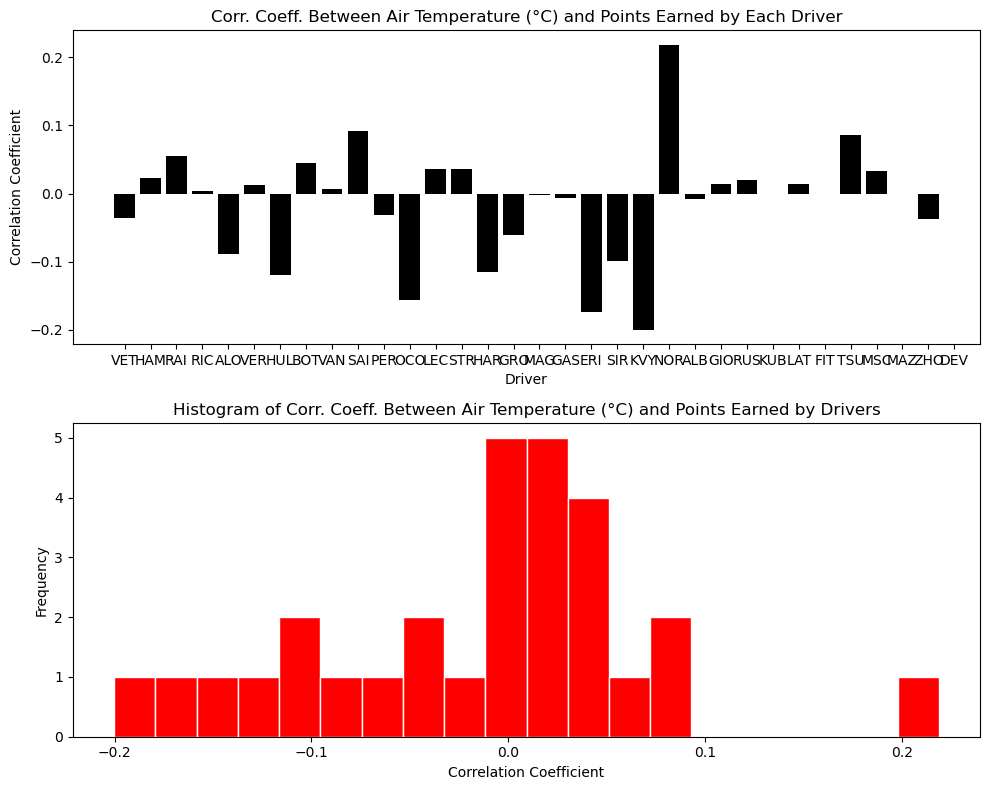

c:\Users\Glenn\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


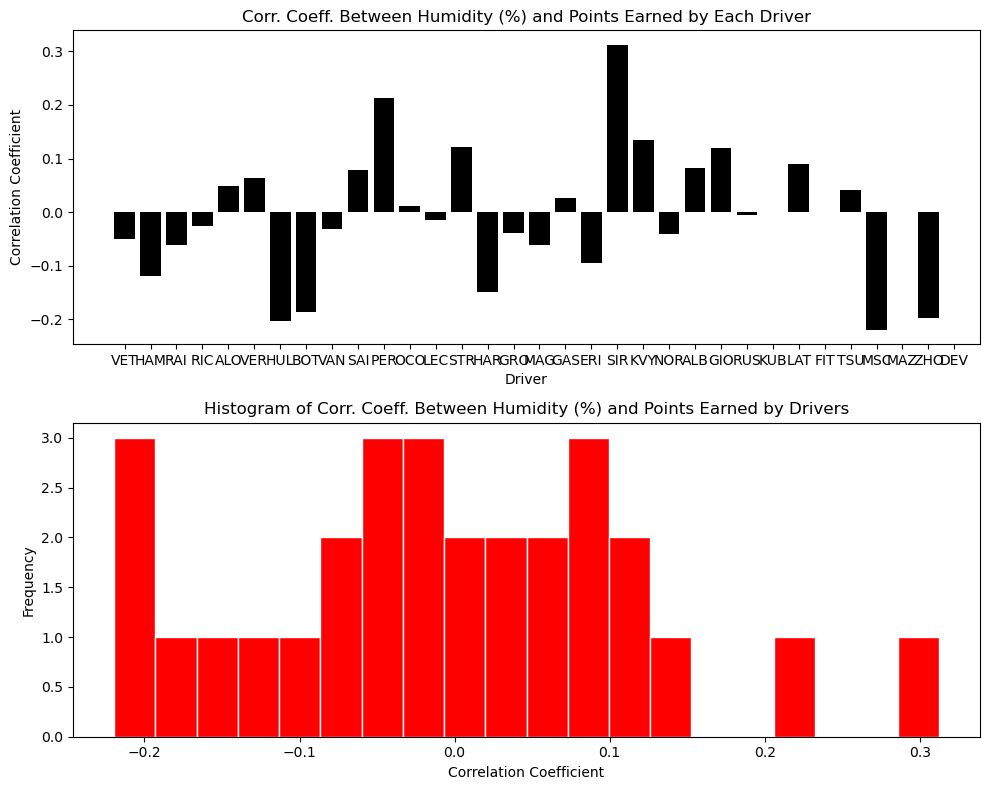

c:\Users\Glenn\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


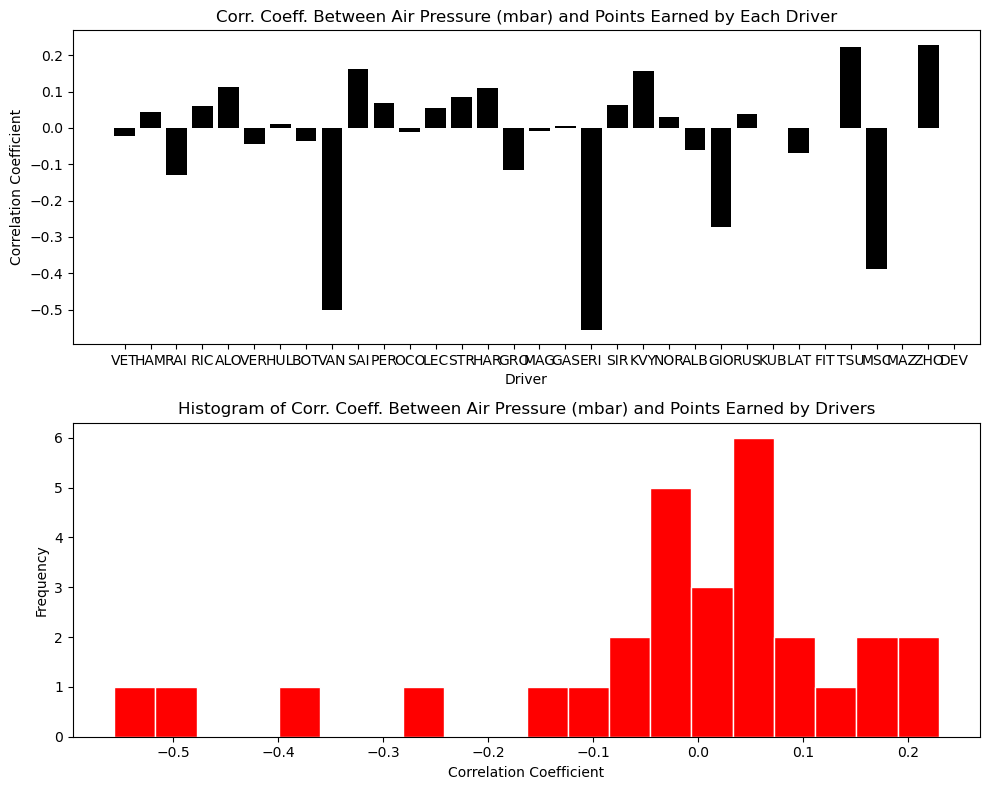

c:\Users\Glenn\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


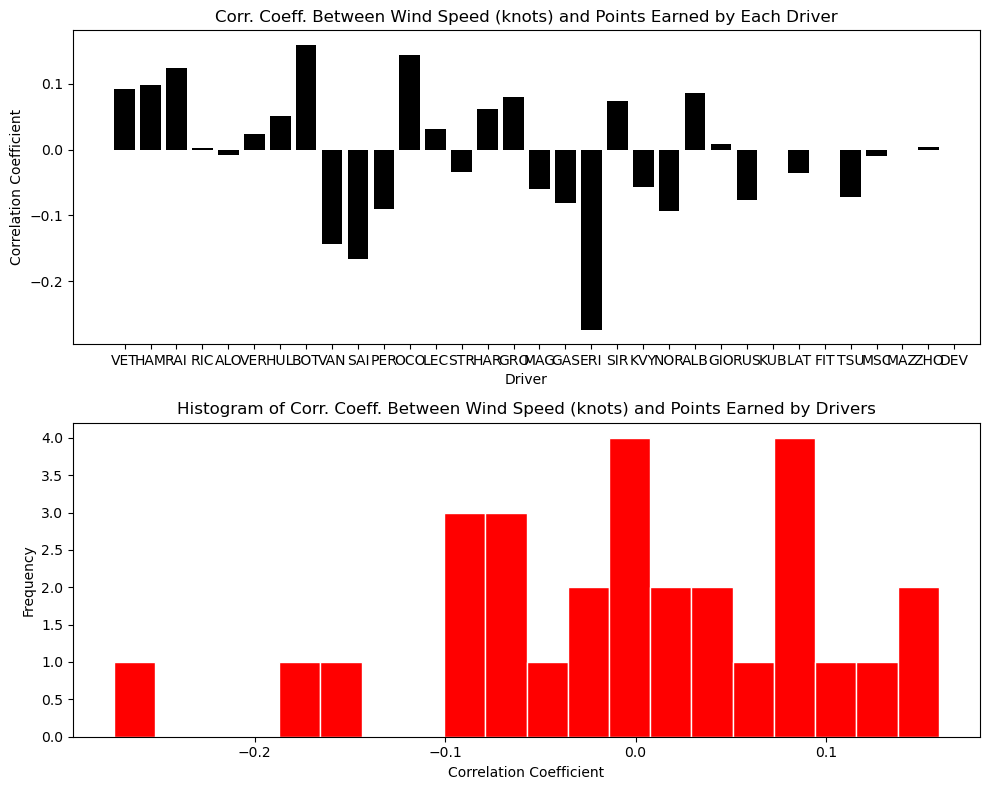

In [6]:
correlation_analysis(csv_file_path, 'AirTemp', 'points', 'Air Temperature', 'Points Earned', u'\u00b0C')
correlation_analysis(csv_file_path, 'Humidity', 'points', 'Humidity', 'Points Earned', '%')
correlation_analysis(csv_file_path, 'Pressure', 'points', 'Air Pressure', 'Points Earned', 'mbar')
correlation_analysis(csv_file_path, 'WindSpeed', 'points', 'Wind Speed', 'Points Earned', 'knots')